## Теоретический материал

#### Метод бисекции 
Отрезок локализации $[a, b]$ будем считать заданным. Предположим, что функция $f$ непрерывна на отрезке $[a, b]$ и на его концах принимает значения разных знаков (т.е. $f(a)f(b) < 0$). 
Находим середину отрезка точку $с$. Если $f(c) = 0$, то корень найден. Если $f(a)f(c) < 0$, то следующая итерация будет проводиться на отрезке $[a, c]$, иначе (в случае $f(c)f(b) < 0$), следующая итерация будет проводиться на отрезке $[c, b]$. 
Середина $n$-го отрезка дает приближение корню $\bar{x}$ , имеющее оценку погрешности  

 $|x_n - \bar{x}| \leq \frac{b-a}{2^{n+1}}$
 
Из этой оценки видно, что метод бисекции сходится со скоростью геометрической прогрессии, знаменатель которой $1/2$. 
Итерации следует вести до тех пор, пока не будет выполнено условие $\frac{b^n - a^n}{2} < \epsilon$ . При его выполнении можно принять середину за приближенное решение с точностью $\epsilon$ . 

#### Метод Ньютона 
Берется какое-либо число $x_0$ как можно ближе к искомому корню $\bar{x}$  и принимается за первое приближение корня. Затем через точку с координатами  $(x_0, f(x_0))$  проводится касательная к графику функции $y=f(x)$ до пересечения с осью абсцисс в точке $(x_1, 0)$. Эта точка пересечения дает нам второе приближение корня $\bar{x}$ . Повторяя этот процесс, получаем все более и более точные значения $x_0, x_1, x_2, ...$  корня $\bar{x}$ . 
С помощью уравнения касательной можно вывести рекуррентную формулу, выражающую очередное, $i+1$-ое приближение $x_{i+1}$  через предыдущее:

$x_{i+1} = x_{i} - \frac{f(x_i)}{f'(x_i)}$

Описанный метод называют еще методом касательных. 
    

## Выполнение лабораторной работы

Подключим необходимые библиотеки

In [211]:
import numpy as np
from scipy import optimize
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Эта функция необходима для удобства построения графиков функция

In [212]:
def plot_func(f, a=0, b=1, step=10**-2, show_grid=True, x_bold=True):
    x = np.arange(a, b, step)
    y = f(x)
    if show_grid:
        plt.grid(show_grid)
    if x_bold:
        plt.plot(x, x*0, 'k')
    plt.plot(x, y)

Реализуем метод бисекции и метод Ньютона

In [213]:
def bisec(f, a, b, eps):
    an = a
    bn = b
    k = 0
    while (bn-an)/2>eps:
        xn = (an + bn)/2
        fa = f(an)
        fb = f(bn)
        fxn = f(xn)
        if fa*fxn <= 0:
            bn = xn
        else:
            an = xn
        k+=1
    xn = (an + bn)/2
    
    return xn, k    

In [214]:
def newton(f, df, x0, eps):
    k = 0
    x1 = x0 - f(x0)/df(x0)
    k+=1
    while abs(x1-x0) >= eps:
        x0 = x1
        x1 = x0 - f(x0)/df(x0)
        k+=1
    return x1, k

#### Задача 2.1.7

Даны два уравнения $f(x)=0$ и $g(x)=0$. Найти с точностью $\epsilon = 10^{−10}$  все корни уравнений,
содержащиеся на отрезке $[a, b]$. Для решения задачи использовать метод бисекции. Найти корни с помощью
встроенной функции root пакета MATHCAD.

$f(x) = ln(x)^2 - 5ln(x) + 6 \\
g(x) = ln(x)^2 - 4ln(x) + 4 \\
\\
a = 5 \\
b = 25 $

Аналитическе решение для $f(x) = 0$:

$x1 = e^2 \approx 7.38905609893065 \\
x2 = e^3 \approx 20.085536923187668 $

Аналитическе решение для $g(x) = 0$:

$x1 = x2 = e^2 \approx 7.38905609893065 $

In [215]:
def f(x):
    return np.log(x)**2 - 5*np.log(x) + 6

In [216]:
def g(x):
    return np.log(x)**2 - 4*np.log(x) + 4

In [217]:
eps = 10**-10

In [218]:
a = 5
b = 25

Локализуем корни графически

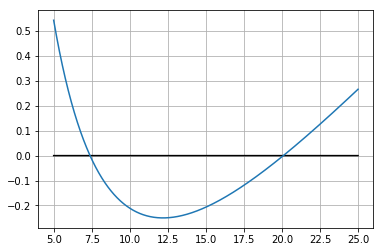

In [219]:
plot_func(f, a, b)

In [220]:
a1 = 5; b1 = 8
a2 = 18; b2 = 21

Найдем корни, используя метод бисекции

In [221]:
print("x1 = %f \nЧисло итераций = %d"%bisec(f, a1, b1, eps))

x1 = 7.389056 
Число итераций = 34


In [223]:
print("x2 = %f \nЧисло итераций = %d"%bisec(f, a2, b2, eps))

x2 = 20.085537 
Число итераций = 34


Найдем корни с помощью библиотечной функций root

In [224]:
optimize.root(f, [a1, b2], ).x.tolist()

[7.389056099639043, 20.085536926477555]

Проделаем те же операции с функцией $g(x)$

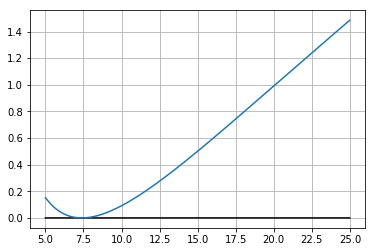

In [225]:
plot_func(g, a, b)

In [226]:
a1 = 5; b1 = 8

In [227]:
print("x1 = %f \nЧисло итераций = %d"%bisec(g, a1, b1, eps))

x1 = 8.000000 
Число итераций = 34


In [228]:
optimize.root(g, [a1, b1], ).x.tolist()

[7.389056240072399, 7.38905599371894]

Как видим, метод бисекции нашел неправильный ответ. Данный метод не работает в случае, если имеется кратный корень, поскольку тогда уравнение можно представить в виде полного квадрата, т.е. нельзя найти такой отрезок, на границах которого функция будет иметь разный знак.

#### Задача 2.2.2

Найти указанный в варианте корень уравнения $f(x)=0$ с точностью $\epsilon =10^{−6}$ , двумя способами.

а) Использовать метод бисекции. Предварительно определить отрезок локализации $[a, b]$.

b) Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять
середину отрезка локализации из п. а).
Сравнить число итераций в п. a), b).

$f(x) = xe^x - x - 1$

Найти корень: положительный

In [229]:
def f(x):
    return x*np.exp(x) - x - 1
def df(x):
    return np.exp(x) + x*np.exp(x) - 1

Локализуем корень графически

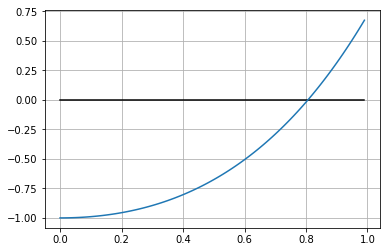

In [230]:
plot_func(f)

In [231]:
eps = 10**-6

In [232]:
a1 = 0.6; b1 = 0.9

Метод бисекции

In [233]:
print("x1 = %f \nЧисло итераций = %d"%bisec(f, a1, b1, eps))

x1 = 0.806466 
Число итераций = 18


Метод Ньютона

In [234]:
print("x1 = %f \nЧисло итераций = %d"%newton(f, df, (b1+a1)/2, eps))

x1 = 0.806466 
Число итераций = 4


Как видно, метод Ньютона справился с задачей бестрее (за меньшее число итераций), чем метод бисекции

#### Задача 2.10.3

Функция $y=f(x)$ задана неявно уравнением $F(x,y)=0$. На отрезке $[1, 5]$ построить таблицу значений
функции $y=f(x)$ с шагом $h=0.5$, применяя один из методов численного решения нелинейного уравнения (с
точностью $\epsilon =10^{−7}$ ). Построить график функции $y=f(x)$ на заданном отрезке.

$F(x, y) = e^{xy} - \cos(xy^3)$

$x \in [0.5, 1.5] \\
y \in [-1.3, -0.3] $

In [250]:
def F(x, y):
    return np.exp(x*y) - np.cos(x*y**3)

In [251]:
def dFdx(x, y):
    return y*np.exp(x*y) + y**3*np.sin(x*y**3)
def dFdy(x, y):
    return x*np.exp(x*y) + 3*x*(y**2)*np.sin(x*(y**3))

Построим $y = f(x)$ на отрезке $[1, 5]$ с шагом $h = 0.5$

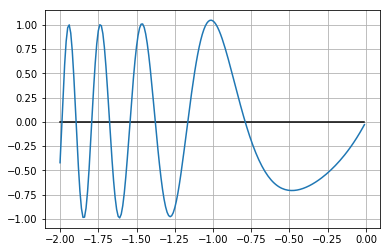

In [269]:
x11 = 1; x22 = 5; h = 0.5; eps = 10**-7
x = np.arange(x11, x22+h, h)
plot_func(lambda y : F((x11+x22)/2, y), a = -2, b = 0)

По построенному $F_1(y) = F(x1, y)$ локализуем начальное приближение $y_0$ для метода Ньютона

In [270]:
y0 = -1.25
y = []

In [271]:
for i in range(x.shape[0]):   
    y.append(newton(lambda y: F(x[i], y), lambda y: dFdy(x[i], y), y0, eps)[0])

In [272]:
print('x\t\t\t  y')
[print(round(_x, 2), '\t\t\t', round(_y, 2)) for _x, _y in zip(x, y)]
pass

x			  y
1.0 			 -1.07
1.5 			 0.0
2.0 			 -1.34
2.5 			 -1.24
3.0 			 -1.16
3.5 			 -1.31
4.0 			 -1.25
4.5 			 -1.2
5.0 			 -1.51


(-2, 0)

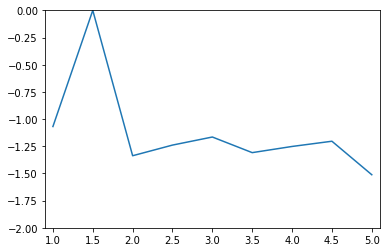

In [273]:
plt.plot(x, y)
plt.xlim(x11-0.1, x22+0.1)
plt.ylim(-2, 0)

Построим теперь эту функцию, учитывая данные условия:

$x \in [0.5, 1.5] \\
y \in [-1.3, -0.3] $

In [282]:
eps = 10**-7
h = 0.1
step = 10**-1
x1 = 0.5; x2 = 1.5
y1 = -1.3; y2 = -0.3

In [283]:
x = np.arange(x1, x2+h, h)

In [284]:
y = []

Локализуем $y_0$:

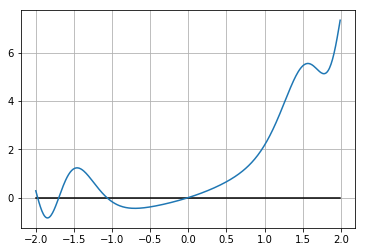

In [285]:
plot_func(lambda y : F((x1+x2)/2, y), a = -2, b = 2)

In [286]:
y0 = -1

In [287]:
for i in range(x.shape[0]):   
    y.append(newton(lambda y: F(x[i], y), lambda y: dFdy(x[i], y), y0, eps)[0])

(-2, 0)

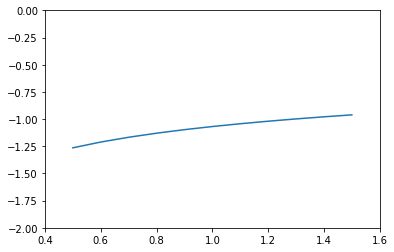

In [288]:
plt.plot(x, y)
plt.xlim(x1-0.1, x2+0.1)
plt.ylim(-2, 0)